In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# add some noise value

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance


In [3]:
X_b

array([[1.        , 1.88582888],
       [1.        , 1.27636914],
       [1.        , 1.44153811],
       [1.        , 0.36096292],
       [1.        , 1.66578145],
       [1.        , 0.70233068],
       [1.        , 0.12817253],
       [1.        , 1.78376904],
       [1.        , 1.85607581],
       [1.        , 0.33826642],
       [1.        , 1.01316952],
       [1.        , 0.44637996],
       [1.        , 1.94357167],
       [1.        , 0.69317453],
       [1.        , 1.42155484],
       [1.        , 1.99328712],
       [1.        , 1.48735708],
       [1.        , 1.08949944],
       [1.        , 0.90041691],
       [1.        , 0.27342945],
       [1.        , 1.22889367],
       [1.        , 0.30457961],
       [1.        , 0.13927766],
       [1.        , 0.42050287],
       [1.        , 1.41140034],
       [1.        , 0.55253492],
       [1.        , 0.76325381],
       [1.        , 0.77139272],
       [1.        , 1.35225325],
       [1.        , 1.48099585],
       [1.

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best
# close enough, but affect by the noise

array([[3.46909023],
       [3.47285305]])

In [6]:
X_new = np.array([[0], [2]])
#use theta_best to predict X_new

In [7]:
X_new_b = np.c_[np.ones((2, 1)), X_new] 
# add x0 = 1 to each instance (important!!!!!)

In [8]:
y_predict = X_new_b.dot(theta_best)
# dot function for multiplication

In [9]:
y_predict

array([[ 3.46909023],
       [10.41479634]])

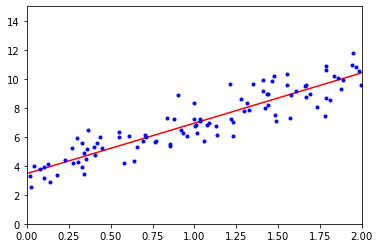

In [10]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()

In [13]:
X_new

array([[0],
       [2]])

In [14]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
lin_reg.fit(X,y)

LinearRegression()

In [16]:
 lin_reg.intercept_, lin_reg.coef_

(array([3.46909023]), array([[3.47285305]]))

In [17]:
 lin_reg.predict(X_new)

array([[ 3.46909023],
       [10.41479634]])

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# X_b is x that add x0 = 1 to each instance

In [19]:
theta_best_svd

array([[3.46909023],
       [3.47285305]])

In [20]:
np.linalg.pinv(X_b).dot(y) #linear regression 找到的
# directly get the intercept and corr

array([[3.46909023],
       [3.47285305]])

In [21]:
learning_rate = 0.1
iterations = 1000
m = 100 # features
theta = np.random.randn(2,1) # random initialization
for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
print(gradients)
# X_b add x0 = 1 to each instance
# That's why we use dot to do matrix multiplacation
# until gradient is 0

[[ 9.43245482e-15]
 [-7.28601507e-15]]


In [22]:
theta # gradient descent 找到的

array([[3.46909023],
       [3.47285305]])

In [23]:
iterations = 50 # iterate 50 tims
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for iteration in range(iterations):
    for i in range(m): # m rounds
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(iteration * m + i)
        theta = theta - learning_rate * gradients


In [24]:
theta

array([[3.483715  ],
       [3.46325589]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_


(array([3.45855843]), array([3.50624015]))

In [27]:
y.ravel()

array([ 9.95403133,  8.60295656,  8.95319161,  5.1275731 ,  8.72576268,
        6.11665653,  4.09112286, 10.8618494 , 10.05947226,  4.87148087,
        6.27317158,  5.20129455, 10.97479395,  5.68672171,  8.00274618,
        9.56421143,  7.09660629,  6.95905187,  8.9152486 ,  4.1686371 ,
        6.0905329 ,  4.29167429,  2.87522311,  5.5898763 ,  9.16027964,
        5.99063156,  5.62438747,  5.74426622,  9.64582619,  7.5227311 ,
        6.48487732,  4.16940845,  6.33759801,  5.28087222,  7.05182799,
        7.28156185,  7.44649814,  9.54520342,  9.8279536 ,  6.02609176,
        5.97141413, 10.20082371,  6.15979992,  7.78944892,  5.91492169,
        2.53490338,  8.17233664,  8.92617945,  4.77354691, 10.50936776,
        6.76235179,  9.61722823,  8.87133604,  7.87138594,  7.20257866,
        8.08810254,  6.02977138,  8.31892481,  3.96944963,  3.94815117,
        3.44001643,  5.21155012, 10.62477376,  8.97546027,  3.33112423,
        5.51389607,  7.22263335, 11.76156732,  6.2332492 ,  4.44

In [28]:
y.ravel()


array([ 9.95403133,  8.60295656,  8.95319161,  5.1275731 ,  8.72576268,
        6.11665653,  4.09112286, 10.8618494 , 10.05947226,  4.87148087,
        6.27317158,  5.20129455, 10.97479395,  5.68672171,  8.00274618,
        9.56421143,  7.09660629,  6.95905187,  8.9152486 ,  4.1686371 ,
        6.0905329 ,  4.29167429,  2.87522311,  5.5898763 ,  9.16027964,
        5.99063156,  5.62438747,  5.74426622,  9.64582619,  7.5227311 ,
        6.48487732,  4.16940845,  6.33759801,  5.28087222,  7.05182799,
        7.28156185,  7.44649814,  9.54520342,  9.8279536 ,  6.02609176,
        5.97141413, 10.20082371,  6.15979992,  7.78944892,  5.91492169,
        2.53490338,  8.17233664,  8.92617945,  4.77354691, 10.50936776,
        6.76235179,  9.61722823,  8.87133604,  7.87138594,  7.20257866,
        8.08810254,  6.02977138,  8.31892481,  3.96944963,  3.94815117,
        3.44001643,  5.21155012, 10.62477376,  8.97546027,  3.33112423,
        5.51389607,  7.22263335, 11.76156732,  6.2332492 ,  4.44

In [29]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

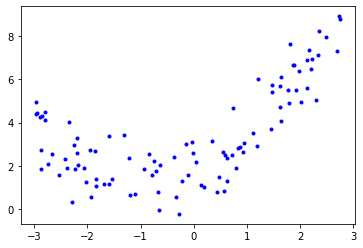

In [30]:
plt.plot(X, y, "b.")
plt.show()
# not fit for straight line

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

C:\Users\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(eta0=0.1, penalty=None)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.46636411]), array([0.95004389]))

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.73534827])

In [34]:
X_poly[0]
# second number is the square of first number

array([2.73534827, 7.48213017])

In [35]:
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [37]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78810115]), array([[1.00443151, 0.5636974 ]]))

In [38]:
prediction = lin_reg.predict(X_poly)

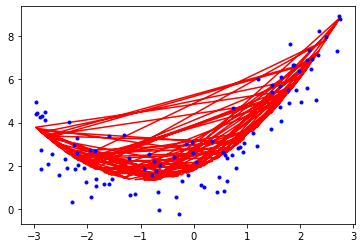

In [39]:
plt.plot(X, prediction, "r-")
plt.plot(X, y ,"b.")
#plt.axis([0, 2, 0, 15])
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    #plt.show()
# here just swtich the test to val for train_test_split
# according to m to decide how many train sets and validation sets to predict

In [41]:
lin_reg=LinearRegression()

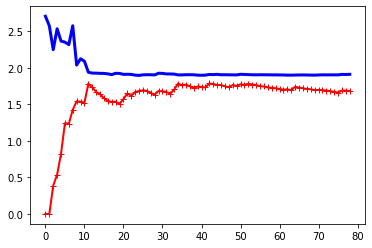

In [42]:
plot_learning_curves(lin_reg, X, y)
#These learning curves are typical of a model that’s underfitting. Both curves
#have reached a plateau; they are close and fairly high.

In [43]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression()),
])
# poly_features come with PolynomialFeatures

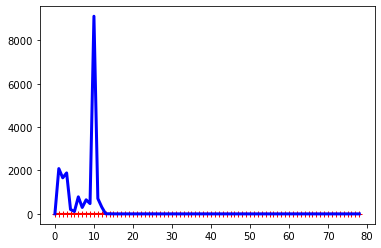

In [45]:
plot_learning_curves(polynomial_regression, X, y)

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
# alpha is constraint
# cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution

array([[4.63558066]])

In [47]:
sgd_reg = SGDRegressor(penalty="l2")
# stochastic gradient descent
 #The penalty hyperparameter sets the type of regularization term to use
 #   half the square of the ℓ norm of the weight vector
# ridge regression

In [48]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [49]:
sgd_reg.predict([[1.5]])


array([4.62480705])

In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.58574632])

In [53]:
sgd_reg=SGDRegressor(penalty="l1")

In [54]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(penalty='l1')

In [55]:
sgd_reg.predict([[1.5]])

array([4.62713981])

In [56]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.59332682])

In [58]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])

In [68]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [70]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)


In [71]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [73]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [81]:
X_train, X_val, y_train, y_val

(array([[-2.06403288],
        [-1.72596534],
        [-1.24713211],
        [-1.25262516],
        [ 0.14853859],
        [-1.9090502 ],
        [-2.06388816],
        [-0.02893854],
        [ 2.69331322],
        [-0.26358009],
        [ 2.81945911],
        [ 1.10539816],
        [-1.17454654],
        [ 0.28026168],
        [-1.12973354],
        [-1.89087327],
        [ 0.60669007],
        [ 2.45592241],
        [-2.72129752],
        [ 1.71105577],
        [ 0.55448741],
        [-0.75275929],
        [-1.89957294],
        [-1.17231738],
        [ 1.24843547]]),
 array([[-2.41396732],
        [-0.80182894],
        [-1.44732011],
        [-2.79366887],
        [ 0.12040813],
        [ 0.67111737],
        [ 0.59195091],
        [ 0.64526911],
        [ 2.19705687],
        [-2.65149833],
        [-0.35908504],
        [ 1.39196365],
        [-2.26777059],
        [-2.60969044],
        [-2.87649303],
        [-2.16303684],
        [ 1.85038409],
        [ 0.08540663],
        [

In [82]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [83]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [84]:
X = iris["data"][:, 3:] # petal width
# the last column

In [85]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [86]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0
# binary search for Iris Virginica

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log_reg = LogisticRegression()

In [90]:
log_reg.fit(X, y)

LogisticRegression()

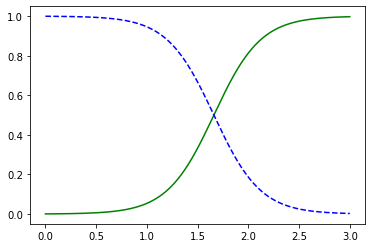

In [97]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
#X_new
y_proba = log_reg.predict_proba(X_new)
#y_proba
#  1 means it is iris virginica
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
# iris virginica's petal width is 2
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty


In [98]:
# there is is a decision point at around 1.6
# which is the 50% chance of belong to which class
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [99]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y) #y==2


LogisticRegression(C=10, multi_class='multinomial')

In [102]:
softmax_reg.predict([[5,2]])

array([2])

In [103]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [104]:
softmax_reg.predict_proba([[2.7, 3]])
# the place where three boundaries meet

array([[0.25623293, 0.45481293, 0.28895414]])